### Dataset

Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years. The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute. It is a multivariate series comprised of seven variables (besides the date and time); they are:
1. global active power: The total active power consumed by the household (kilowatts)
2. global reactive power: The total reactive power consumed by the household (kilowatts)
3. voltage: Average voltage (volts)
4. global intensity: Average current intensity (amps)
5. sub metering 1: Active energy for kitchen (watt-hours of active energy)
6. sub metering 2: Active energy for laundry (watt-hours of active energy)
7. sub metering 3: Active energy for climate control systems (watt-hours of active energy)

Columns of data set:
1. date: Date in format dd/mm/yyyy 
2. time: time in format hh:mm:ss 
3. global_active_power: household global minute-averaged active power (in kilowatt) 
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
5. voltage: minute-averaged voltage (in volt) 
6. global_intensity: household global minute-averaged current intensity (in ampere) 
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

Active and reactive energy refer to the technical details of alternative current. In general terms, the active energy is the real power consumed by the household, whereas the reactive energy is the unused power in the lines. We can see that the dataset provides the active power as well as some division of the active power by main circuit in the house, specifically the kitchen, laundry, and climate control. These are not all the circuits in the household. The remaining watt-hours can be calculated from the active energy by first converting the active energy to watt-hours then subtracting the other sub-metered active energy in watt-hours, as follows: <br>
remainder = ((global_act_pwr × 1000) / 60) − (sub_met_1 + sub_met_2 + sub_met_3)

<br> Source:  https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load all data
dataset = pd.read_csv(
    filepath_or_buffer='Data/household_power_consumption.txt',
    sep=';', header=0,low_memory=False, na_values='?',
    parse_dates={'datetime':[0,1]}, index_col=['datetime'],
    dtype={
        'Global_active_power' : np.float64,
        'Global_reactive_power' : np.float64,
        'Voltage' : np.float64,
        'Global_intensity' : np.float64,
        'Sub_metering_1' : np.float64,
        'Sub_metering_2' : np.float64,
        'Sub_metering_3' : np.float64
    }
)
print(dataset.shape)
print(dataset.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [3]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [4]:
dataset['Sub_metering_4'] = (dataset['Global_active_power'] * 1000 / 60) -\
                              (dataset['Sub_metering_1'] +\
                                dataset['Sub_metering_2'] +\
                                  dataset['Sub_metering_3'])

In [5]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


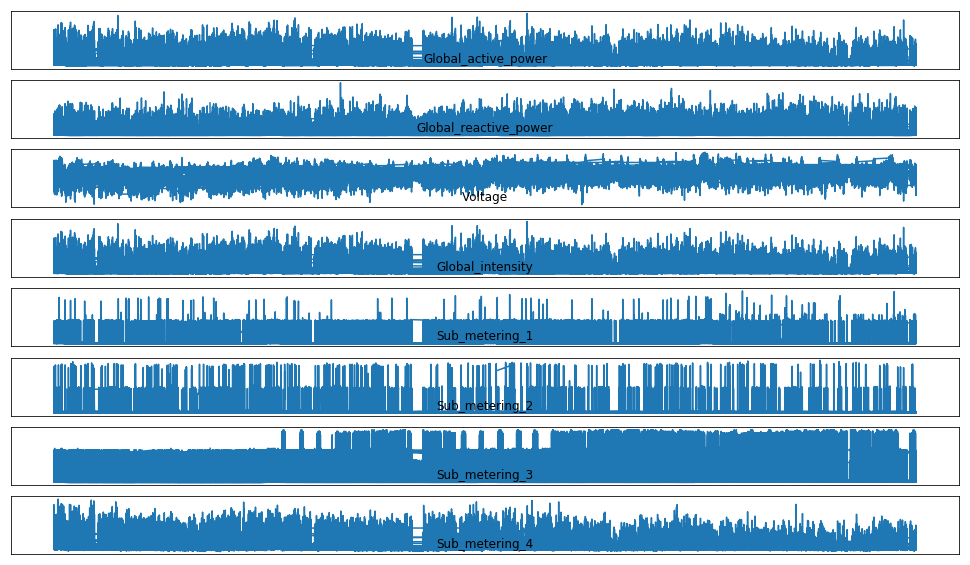

In [6]:
# line plot for each variable
plt.figure(figsize=[17, 10])
for i in range(len(dataset.columns)):
    # create subplot
    plt.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # plot data
    plt.plot(dataset[name])
    # set title
    plt.title(name, y=0)
    # turn off ticks to remove clutter
    plt.yticks([])
    plt.xticks([])

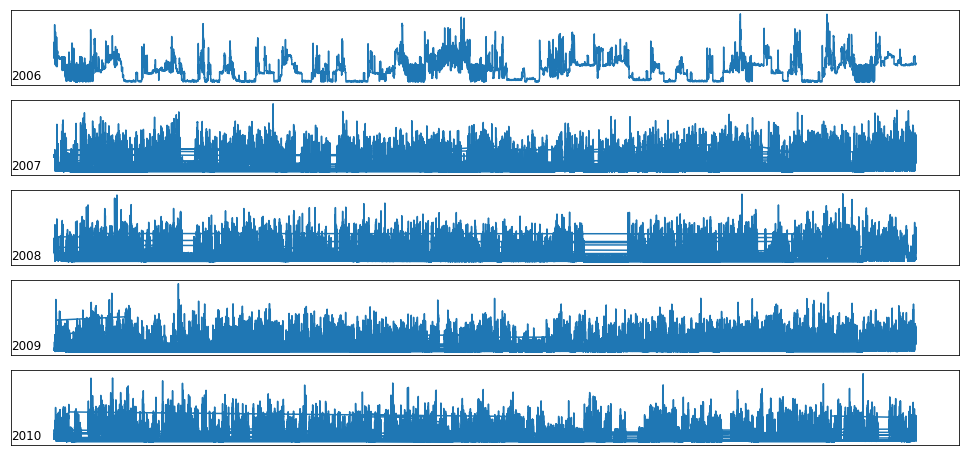

In [7]:
# line plot for Global active power for different year
years = ['2006', '2007', '2008', '2009', '2010']
plt.figure(figsize=[17, 8])
for i in range(len(years)):
    # create subplot
    plt.subplot(len(years),1 ,i+1)
    # determine which year
    year = years[i]
    global_active_power = dataset[str(year)]['Global_active_power']
    plt.plot(global_active_power)
    # add title
    plt.title(str(year), y=0, loc='left')
    # turn off ticks to remove clutter
    plt.yticks([])
    plt.xticks([])

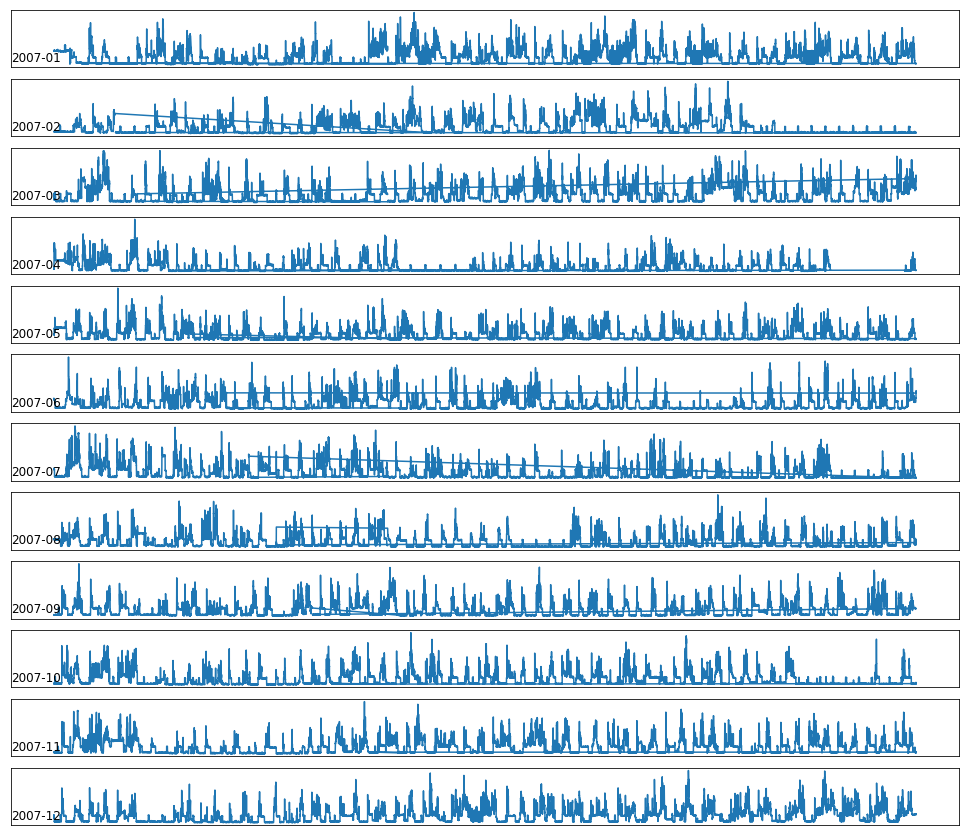

In [8]:
# lineplot for Global active power for various month of year 2017
year = ['2007']
plt.figure(figsize=[17, 15])
for i in range(12):
    # create sub plot
    plt.subplot(12, 1, i+1)
    # determine which month
    month = str(year[0]) + '-' + "{:02d}".format(i+1)
    global_active_power = dataset[month]['Global_active_power']
    plt.plot(global_active_power)
    # add title
    plt.title(month, y=0, loc='left')
    plt.yticks([])
    plt.xticks([])

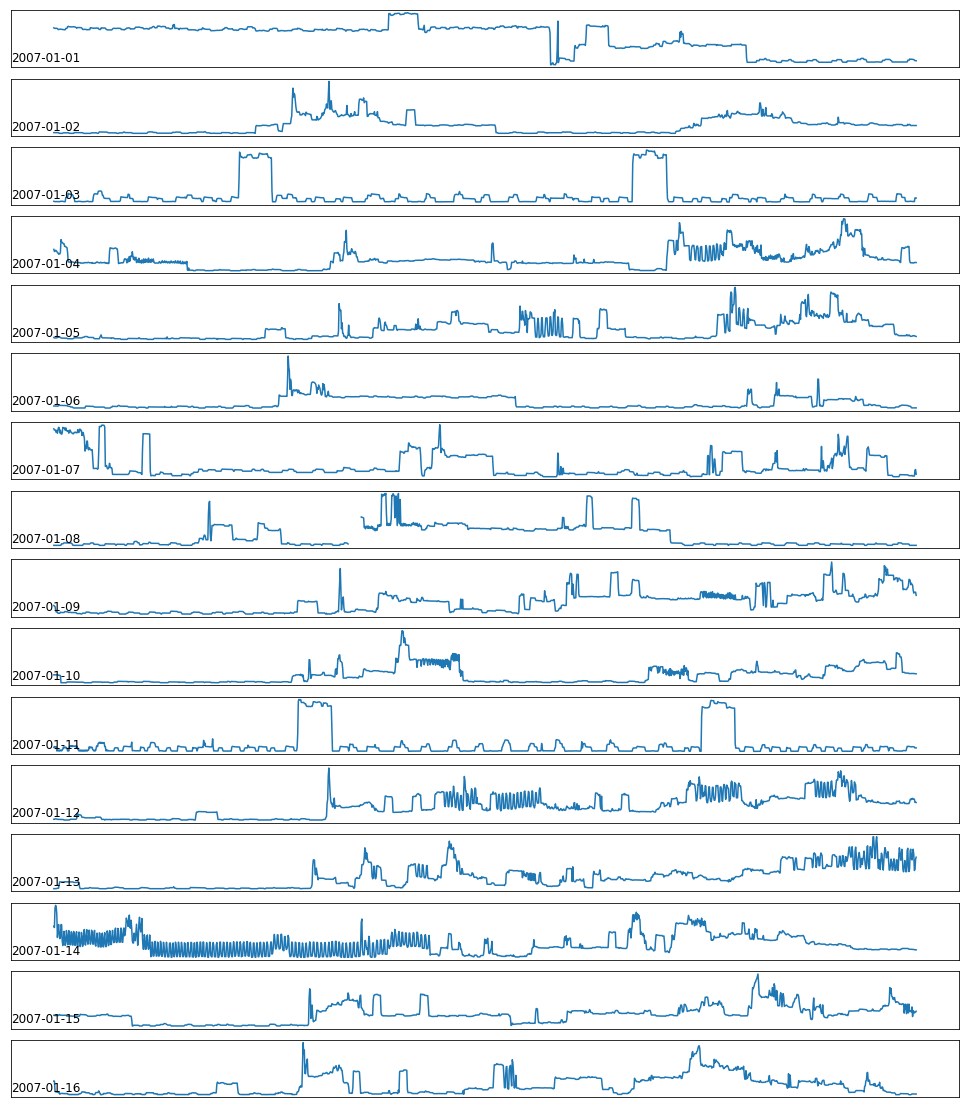

In [9]:
# lineplot for Global active power for various days in Jan 2017
year = ['2007']
month = ['01']
plt.figure(figsize=[17, 20])
for i in range(16):
    # create sub plot
    plt.subplot(16, 1, i+1)
    # determine which month
    day = str(year[0]) + '-' + str(month[0]) + '-' + "{:02d}".format(i+1)
    global_active_power = dataset[day]['Global_active_power']
    plt.plot(global_active_power)
    # add title
    plt.title(day, y=0, loc='left')
    plt.yticks([])
    plt.xticks([])

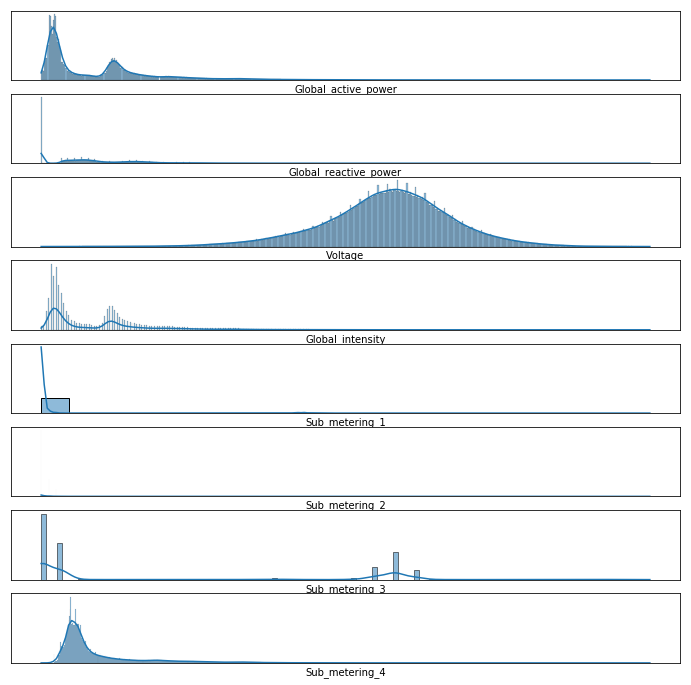

In [10]:
# Distributions plot for each variable
plt.figure(figsize=[12, 12])
for i in range(len(dataset.columns)):
    # create subplot
    plt.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # plot data
    sns.histplot(data=dataset, x=name, kde=True)
    plt.ylabel('')
    # turn off ticks to remove clutter
    plt.yticks([])
    plt.xticks([])

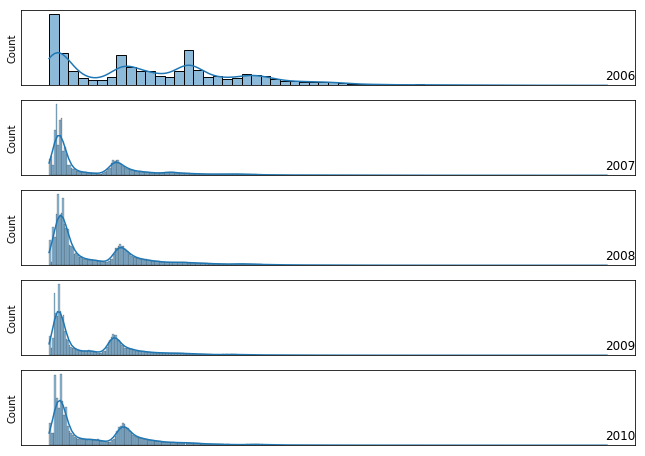

In [11]:
# line plot for Global active power for different year
years = ['2006', '2007', '2008', '2009', '2010']
plt.figure(figsize=[11, 8])
for i in range(len(years)):
    # create subplot
    plt.subplot(len(years),1 ,i+1)
    # determine which year
    year = years[i]
    global_active_power = dataset[str(year)]['Global_active_power']
    sns.histplot(x=global_active_power, kde=True)
    # add title
    plt.title(str(year), y=0, loc='right')
    # turn off ticks to remove clutter
    plt.xlabel('')
    plt.yticks([])
    plt.xticks([])

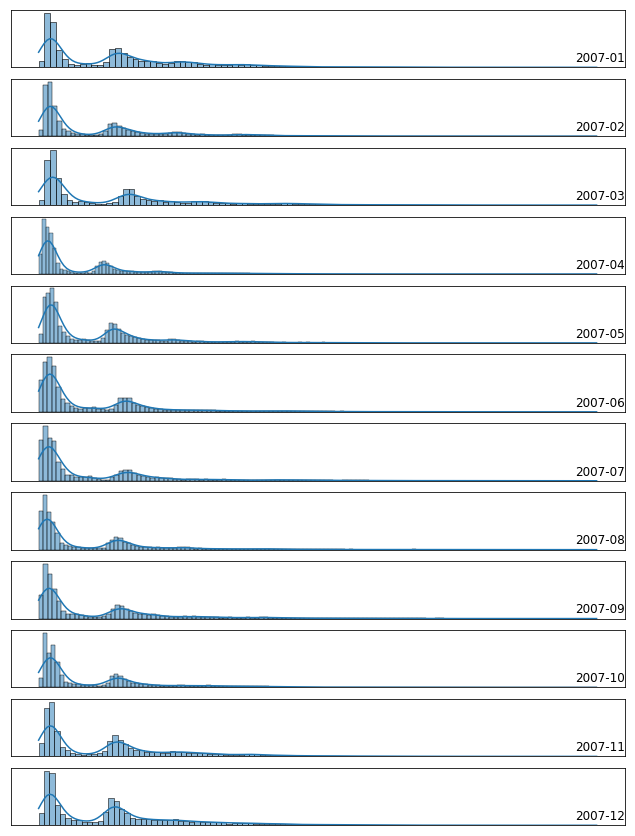

In [12]:
# lineplot for Global active power for various month of year 2017
year = ['2007']
plt.figure(figsize=[11, 15])
for i in range(12):
    # create sub plot
    plt.subplot(12, 1, i+1)
    # determine which month
    month = str(year[0]) + '-' + "{:02d}".format(i+1)
    global_active_power = dataset[month]['Global_active_power']
    sns.histplot(x=global_active_power, kde=True)
    # add title
    plt.title(month, y=0, loc='right')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])
    plt.xticks([])

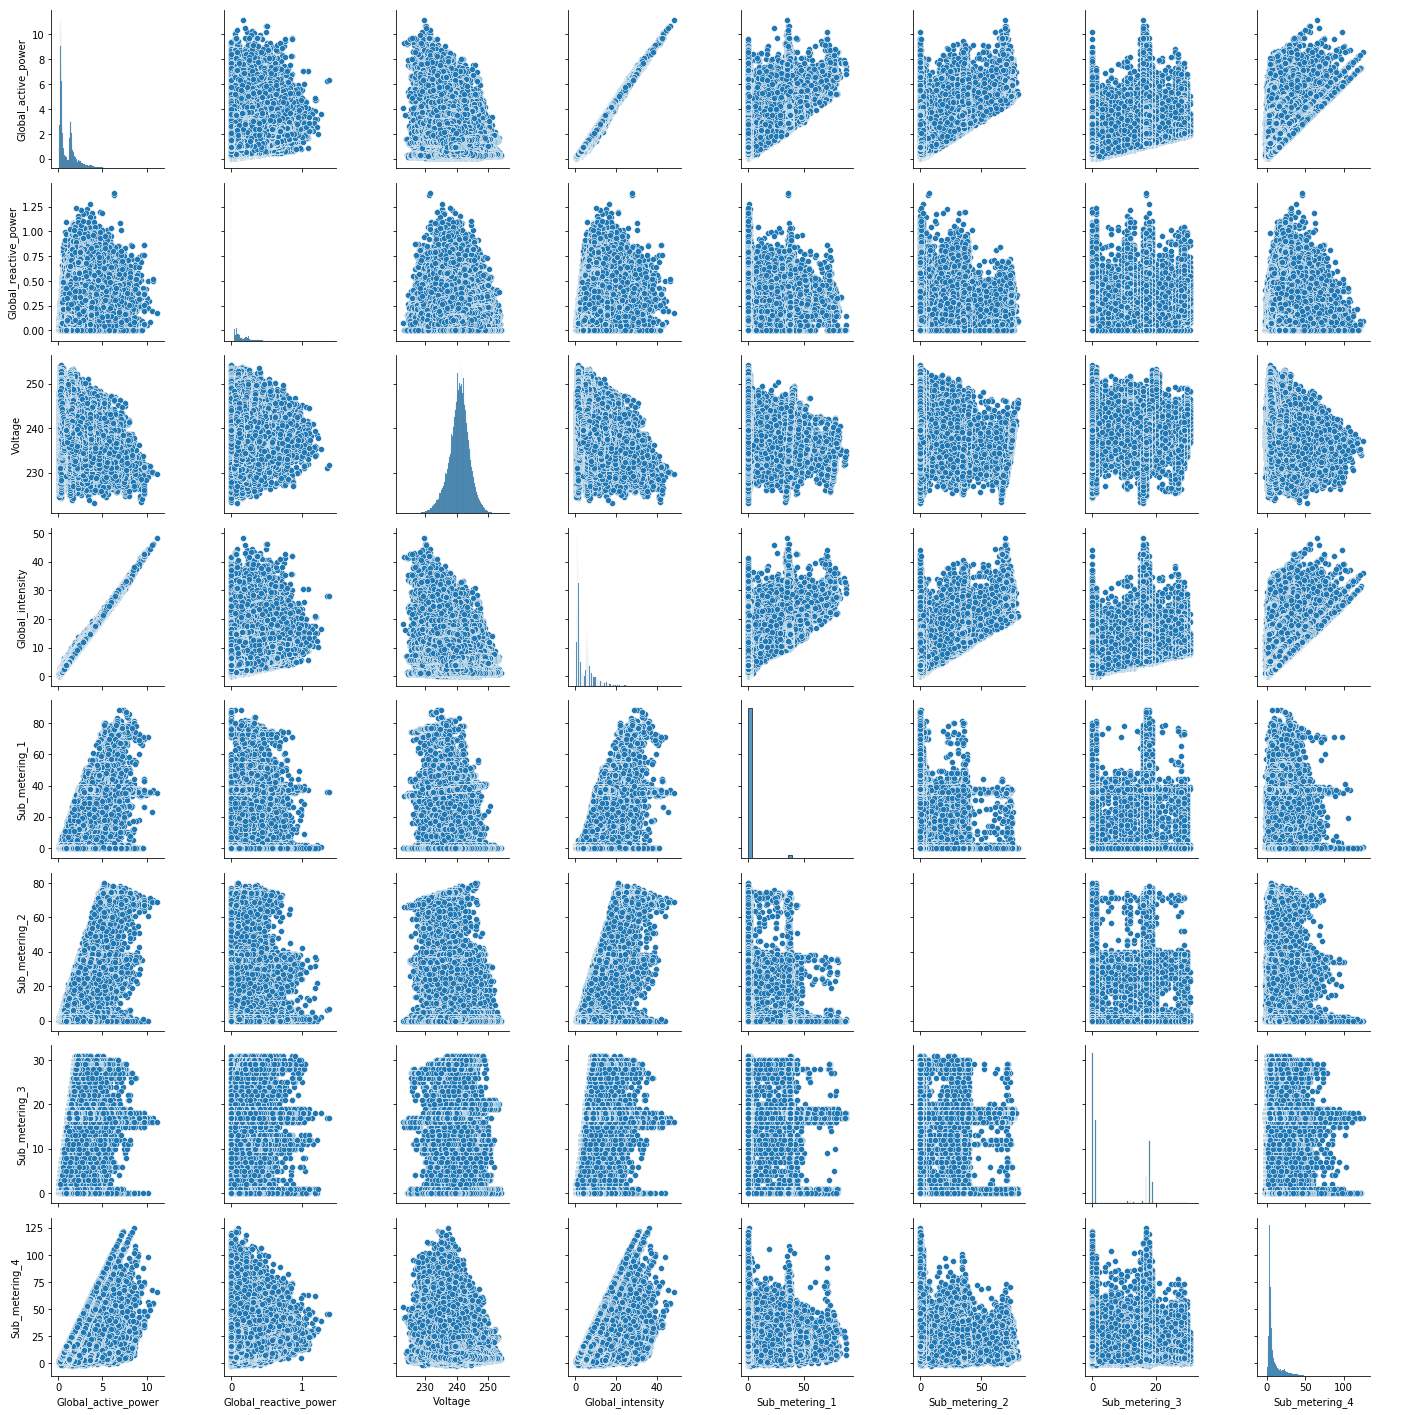

In [13]:
sns.pairplot(data=dataset)